In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -3.7

Y_OS = [3840.0, 3677.0, 3490.0, 3364.0, 3125.0, 3045.0, 2947.0, 2883.0, 2661.0, 2613.0, 2384.0, 
        2239.0, 2293.0, 2067.0, 1997.0, 1894.0, 1849.0, 1665.0, 1676.0, 1588.0, 1569.0, 1480.0, 
        1330.0, 1222.0, 1367.0, 1264.0, 1147.0, 1088.0, 1076.0, 1090.0, 921.0, 885.0, 886.0, 
        888.0, 919.0, 869.0, 843.0, 916.0, 992.0, 1012.0, 1277.0, 1584.0, 2041.0, 2551.0, 3176.0, 
        3188.0, 2896.0, 2143.0, 1579.0, 994.0, 745.0, 545.0, 468.0, 397.0, 357.0, 326.0, 322.0, 
        307.0, 287.0, 265.0, 281.0, 281.0, 264.0, 249.0, 240.0, 197.0, 216.0, 181.0, 152.0, 162.0, 
        136.0, 129.0, 151.0, 159.0, 127.0, 133.0, 143.0, 127.0, 111.0, 105.0, 110.0, 116.0, 94.0,
        110.0, 98.0, 92.0, 79.0, 102.0, 84.0, 101.0, 78.0, 83.0, 63.0, 63.0, 73.0, 77.0, 61.0, 73.0, 
        60.0, 62.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [605.0, 605.0, 555.0, 544.0, 579.0, 572.0, 607.0, 542.0, 490.0, 498.0, 494.0, 454.0, 433.0, 
        423.0, 399.0, 451.0, 404.0, 378.0, 379.0, 350.0, 377.0, 366.0, 346.0, 310.0, 315.0, 341.0, 
        300.0, 301.0, 312.0, 263.0, 269.0, 251.0, 220.0, 221.0, 228.0, 213.0, 219.0, 211.0, 189.0, 
        202.0, 217.0, 213.0, 200.0, 182.0, 219.0, 168.0, 149.0, 167.0, 149.0, 139.0, 132.0, 138.0, 
        137.0, 146.0, 135.0, 124.0, 115.0, 109.0, 100.0, 110.0, 111.0, 94.0, 90.0, 91.0, 90.0, 81.0, 
        75.0, 86.0, 76.0, 76.0, 81.0, 77.0, 64.0, 71.0, 69.0, 60.0, 51.0, 55.0, 49.0, 61.0, 47.0, 39.0, 
        59.0, 42.0, 36.0, 45.0, 44.0, 46.0, 41.0, 31.0, 45.0, 38.0, 33.0, 46.0, 35.0, 27.0, 36.0, 26.0, 
        23.0, 34.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [12.0, 6.0, 17.0, 5.0, 11.0, 14.0, 13.0, 16.0, 23.0, 18.0, 22.0, 22.0, 26.0, 25.0, 
          42.0, 31.0, 34.0, 37.0, 39.0, 45.0, 52.0, 39.0, 56.0, 56.0, 64.0, 77.0, 97.0, 126.0, 
          117.0, 132.0, 143.0, 159.0, 237.0, 274.0, 338.0, 422.0, 475.0, 640.0, 897.0, 1169.0, 
          1601.0, 2484.0, 3848.0, 6007.0, 8180.0, 9444.0, 8342.0, 5538.0, 2992.0, 1528.0, 702.0, 
          398.0, 268.0, 189.0, 134.0, 93.0, 98.0, 63.0, 42.0, 38.0, 32.0, 28.0, 26.0, 14.0, 17.0, 
          18.0, 14.0, 10.0, 12.0, 9.0, 8.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 
          1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [5.0, 5.0, 3.0, 1.0, 2.0, 5.0, 0.0, 7.0, 3.0, 5.0, 3.0, 7.0, 5.0, 6.0, 9.0, 9.0, 9.0, 6.0, 
         10.0, 11.0, 12.0, 12.0, 13.0, 11.0, 12.0, 16.0, 12.0, 12.0, 20.0, 16.0, 18.0, 24.0, 25.0, 
         33.0, 28.0, 28.0, 36.0, 28.0, 32.0, 49.0, 28.0, 48.0, 62.0, 54.0, 54.0, 74.0, 94.0, 94.0, 
         138.0, 120.0, 162.0, 192.0, 263.0, 263.0, 376.0, 468.0, 619.0, 857.0, 1367.0, 2044.0, 3014.0, 
         4067.0, 4535.0, 3923.0, 2588.0, 1415.0, 665.0, 322.0, 195.0, 120.0, 99.0, 74.0, 39.0, 31.0, 
         27.0, 25.0, 22.0, 5.0, 17.0, 15.0, 11.0, 9.0, 5.0, 6.0, 8.0, 7.0, 5.0, 3.0, 7.0, 9.0, 0.0, 
         3.0, 4.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [17.0, 11.0, 20.0, 6.0, 13.0, 19.0, 13.0, 23.0, 26.0, 23.0, 25.0, 29.0, 31.0, 31.0, 51.0, 
        40.0, 43.0, 43.0, 49.0, 56.0, 64.0, 51.0, 69.0, 67.0, 76.0, 93.0, 109.0, 138.0, 137.0, 
        148.0, 161.0, 183.0, 262.0, 307.0, 366.0, 450.0, 511.0, 668.0, 929.0, 1218.0, 1629.0, 
        2532.0, 3910.0, 6061.0, 8234.0, 9518.0, 8436.0, 5632.0, 3130.0, 1648.0, 864.0, 590.0, 
        531.0, 452.0, 510.0, 561.0, 717.0, 920.0, 1409.0, 2082.0, 3046.0, 4095.0, 4561.0, 3937.0, 
        2605.0, 1433.0, 679.0, 332.0, 207.0, 129.0, 107.0, 75.0, 43.0, 34.0, 29.0, 28.0, 25.0, 8.0, 
        21.0, 18.0, 12.0, 11.0, 6.0, 7.0, 9.0, 8.0, 7.0, 5.0, 8.0, 10.0, 1.0, 6.0, 7.0, 4.0, 4.0, 4.0, 
        5.0, 1.0, 1.0, 2.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 87472.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, p1L1, p2L1, p3L1, alphaR1, p1R1, p2R1, p3R1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, p1L2, p2L2, p3L2, alphaR2, p1R2, p2R2, p3R2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = NA60
func_Psi = NA60
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

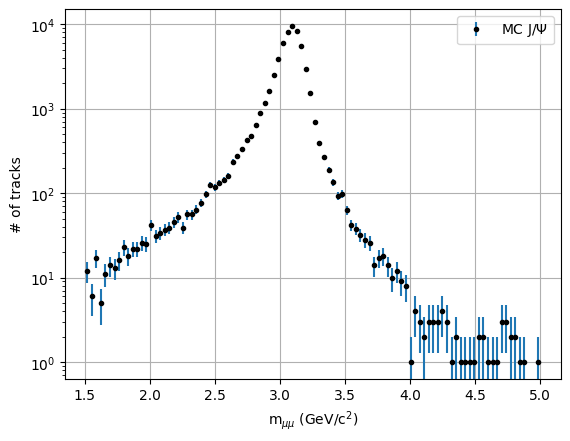

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([np.max(y_data), 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 2, 2, 1, 2.233482641523906, 1, 1, 1])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [9428.35600665285, 3.0924690211552583, 0.06890846886631992, -0.7361530655015687, 0.18388902817179442, 1.2303002950368698, 0.033943746654380824, 1.4560900046649587, 0.11502338566103221, 1.5588161513211223, 0.09635400069709106]
pcov: 
 [[ 7.15230721e+03  2.64313884e-02 -7.76337990e-02  3.20600707e+00
  -6.13345725e-02  1.11593332e-02 -3.61072880e-02 -7.31984873e+00
  -6.68687423e-01  3.60414284e+00  3.69468961e-01]
 [ 2.64313884e-02  1.28651975e-06 -1.20659673e-06  1.66905171e-04
  -1.45108987e-05  4.02502301e-05  3.26873393e-06 -6.38231837e-05
  -4.14370019e-06  1.96428229e-05  1.08683605e-06]
 [-7.76337990e-02 -1.20659673e-06  2.16176677e-06 -2.00214968e-04
   1.44542559e-05 -3.84300559e-05 -2.67591959e-06  2.19804451e-04
   2.00770696e-05 -1.10336615e-04 -1.17287684e-05]
 [ 3.20600707e+00  1.66905171e-04 -2.00214968e-04  3.41113988e-02
  -3.62162822e-03  1.08557859e-02  1.02167413e-03 -1.64500161e-02
  -1.38019126e-03  7.40272183e-03  7.22903696e-04]
 [-6.13345725e-02 -1.45108

fit error : 84.5720010715054


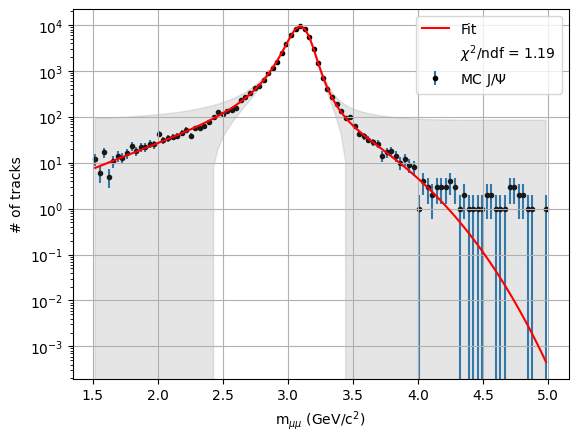

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

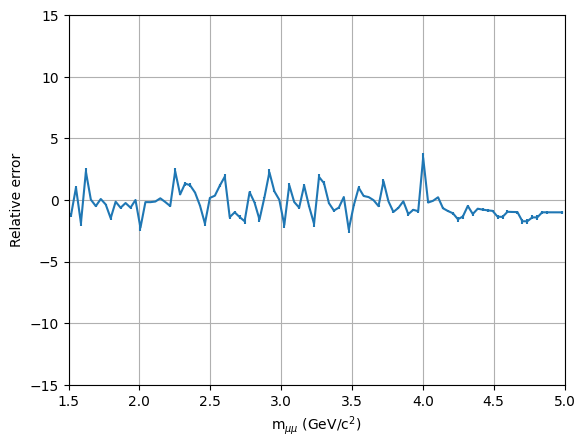

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

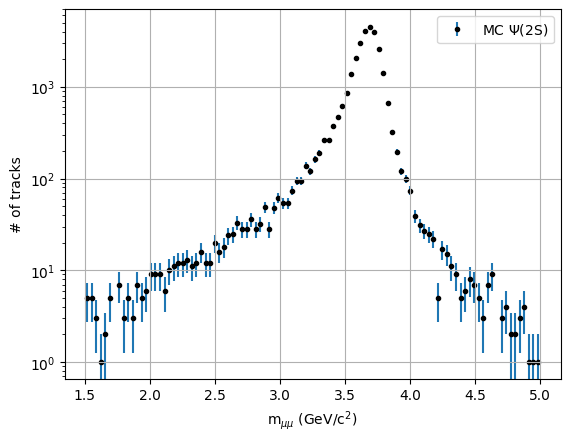

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([np.max(y_data), 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 1, 1, 1, 2.283717751711943, 1, 1, 1])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [4522.748468436964, 3.6833218224284066, 0.07131466870188144, -0.8090482944249037, 0.19849526281886362, 1.1991912569935943, 0.02870313886965366, 1.8237273336096393, 0.16627709867831042, 1.2059682415395654, 0.027740617934228676]
pcov: 
 [[ 2.29096075e+03  1.38489461e-02 -3.65158094e-02  6.09809130e-01
   5.21380290e-02 -2.03520483e-01 -3.12464356e-02 -1.23896291e+00
  -6.71050796e-02  1.89401224e-01  1.10295191e-02]
 [ 1.38489461e-02  2.40957085e-06 -1.88676619e-06  2.56906249e-04
  -2.34350655e-05  5.74178658e-05  4.23013591e-06 -4.18963720e-05
   1.25382273e-07 -1.81753041e-06 -6.70901842e-07]
 [-3.65158094e-02 -1.88676619e-06  2.31539440e-06 -2.26828134e-04
   1.83427369e-05 -4.37836481e-05 -2.92559603e-06  8.67441350e-05
   4.11404368e-06 -1.27235121e-05 -8.44052668e-07]
 [ 6.09809130e-01  2.56906249e-04 -2.26828134e-04  3.94485007e-02
  -4.29586330e-03  1.11463201e-02  9.24497558e-04 -6.87761749e-03
  -1.86634347e-04  5.10337912e-04  1.80057096e-06]
 [ 5.21380290e-02 -2.3435

fit error : 47.86474068291472


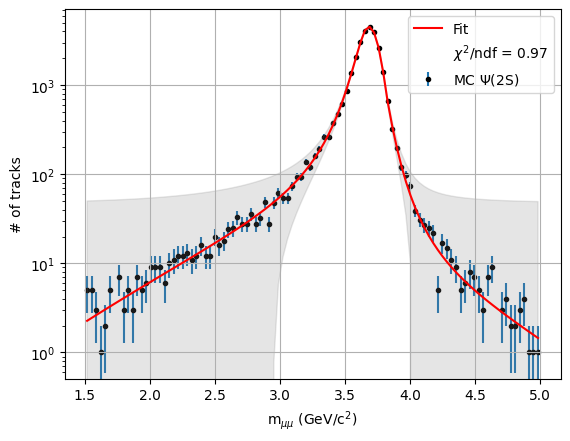

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

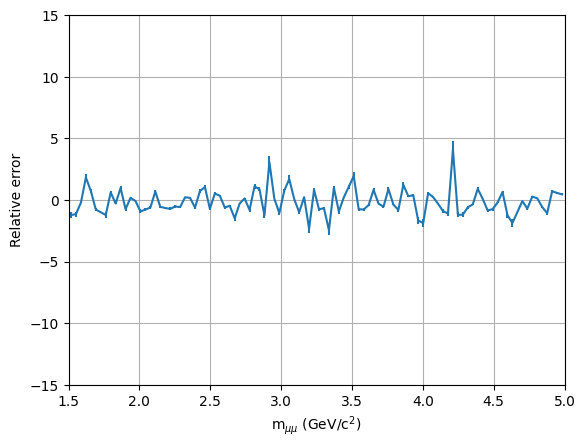

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

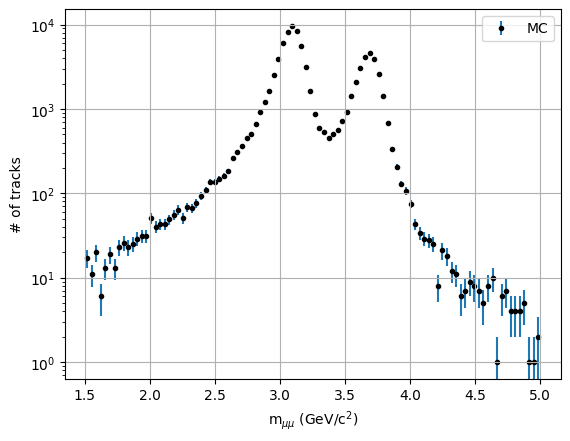

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [9417.61801496116, 3.0926004597425285, 0.06904522739682593, 4515.051057836156, 3.6833213708459738, 0.0715577800327398]
pcov: 
 [[ 4.80637666e+03  3.91362928e-03 -2.03995007e-02 -4.01426052e+01
  -8.58892138e-04  1.76324536e-03]
 [ 3.91362928e-03  2.27341422e-07 -2.66338501e-08  8.23666598e-05
   6.31962990e-09 -6.37438375e-09]
 [-2.03995007e-02 -2.66338501e-08  1.61593966e-07  7.20934421e-04
   1.93213455e-08 -3.42424881e-08]
 [-4.01426052e+01  8.23666598e-05  7.20934421e-04  2.24565266e+03
   5.65836409e-03 -2.13363029e-02]
 [-8.58892138e-04  6.31962990e-09  1.93213455e-08  5.65836409e-03
   5.08046633e-07 -1.18321600e-07]
 [ 1.76324536e-03 -6.37438375e-09 -3.42424881e-08 -2.13363029e-02
  -1.18321600e-07  3.86497880e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.67928831e+00, -1.99726553e-03, -1.79094356e+00,  2.88838795e+00,
        3.47932827e-01, -7.94331029e-01,  1.09110635e+00, -9.47781088e-01,
       -1.15486423e+00, -2.25664797e-01, -2.22167423e-01, -5.49118307e-01,
 

fit error : 83.9763617012437


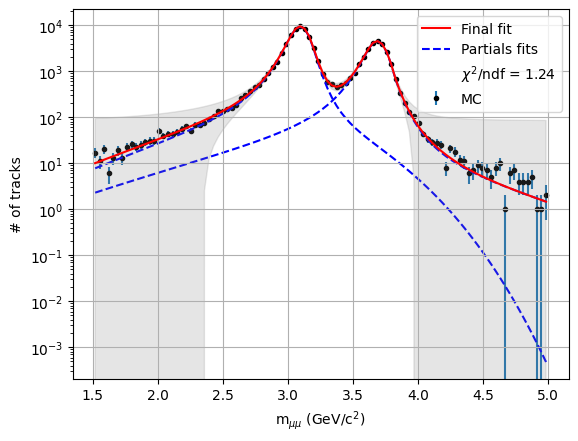

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_4619/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


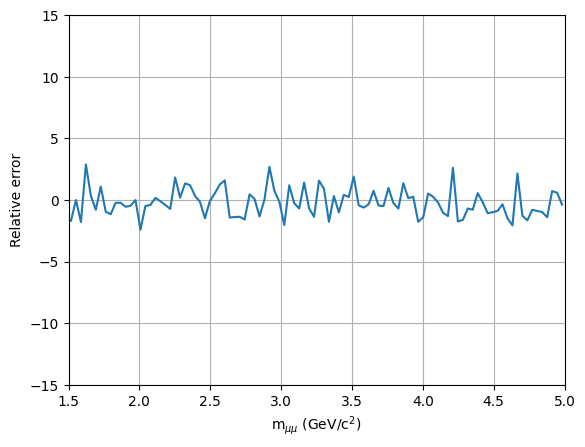

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

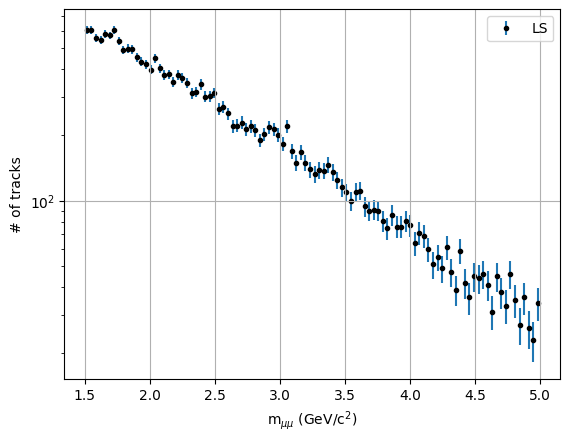

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.446699825768436, 5.647162394837894, 4.784859657613865, 4.442018808842156, 3.3173784596362537]
pcov: 
 [[ 4.49696385e-04 -8.17540444e-05  9.87769081e-05  2.61337344e-05
   2.24894885e-04]
 [-8.17540444e-05  1.20795581e-04  2.92689039e-05 -1.18437880e-05
   6.24942664e-05]
 [ 9.87769081e-05  2.92689039e-05  2.79059583e-04  2.26288324e-04
  -2.85967399e-05]
 [ 2.61337344e-05 -1.18437880e-05  2.26288324e-04  3.86717653e-04
  -6.23391248e-04]
 [ 2.24894885e-04  6.24942664e-05 -2.85967399e-05 -6.23391248e-04
   7.11024593e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 0.70779961,  0.05109318,  1.50479112,  1.32849191, -0.79559058,
       -1.12653689, -3.1016663 , -1.0983822 ,  0.56869619, -0.40071363,
       -0.81747347,  0.41781939,  0.82985495,  0.72555227,  1.34469821,
       -1.73863779, -0.0712735 ,  0.68545832,  0.06936504,  1.04944617,
       -0.9182422 , -0.89076854, -0.37677256,  1.09420633,  0.26907887,
       -1.65070805,  0.08586394, -0.47956965, -1.58002922,  0.784162

fit error : 0.09135926407013367


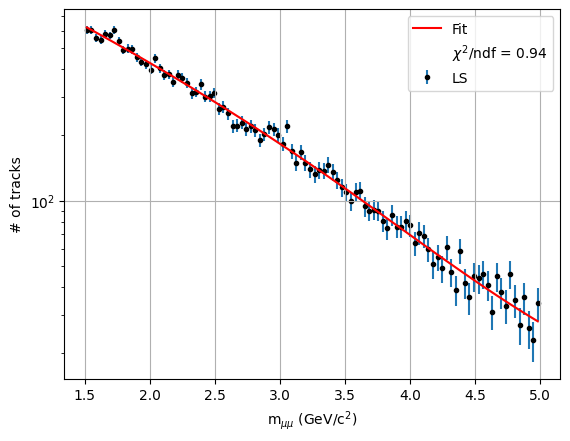

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

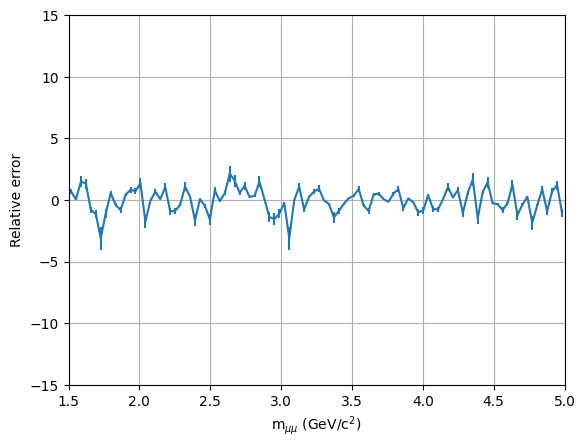

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

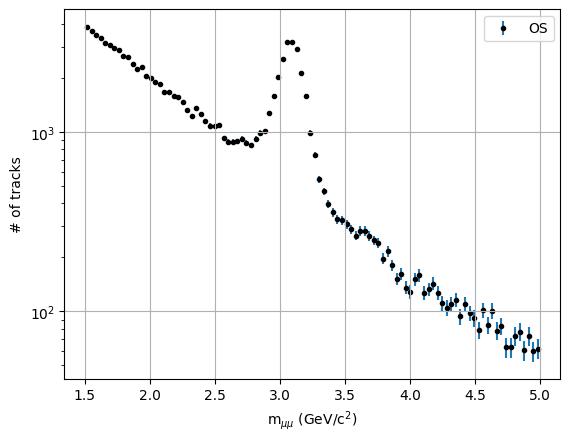

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2, y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2909.266649761993, 3.0884298822701646, 0.07579931575253014, 42.045732333559926, 3.683708543758102, 0.06418320184311958, 8.281599487069391, 6.925385149431709, 5.677785238890602, 5.2496797582834605, 4.131580713315331]
pcov: 
 [[ 2.22942396e+03  6.47812200e-03 -3.72788532e-02  8.24158190e+00
  -3.03168902e-02  6.10823219e-02 -1.99190262e-02 -1.25838996e-02
  -6.61756413e-02 -3.58936761e-02 -4.32966092e-02]
 [ 6.47812200e-03  1.68892142e-06 -5.19874135e-07 -3.76948486e-04
   1.46400245e-06 -2.55187483e-06  4.62402501e-07  2.64038634e-06
   5.06182340e-06  2.43648161e-06  4.25945603e-06]
 [-3.72788532e-02 -5.19874135e-07  2.14982134e-06  2.36366519e-03
  -3.48440418e-06  7.93895914e-06 -3.45573196e-06 -7.86285985e-06
  -2.14794297e-05 -1.40368669e-05 -7.68372255e-06]
 [ 8.24158190e+00 -3.76948486e-04  2.36366519e-03  2.56013038e+02
   3.35239399e-02 -2.39740767e-01 -1.51250867e-02 -1.84323411e-02
  -9.26040945e-02 -9.20252209e-02  6.67708561e-02]
 [-3.03168902e-02  1.46400245e-06 -

fit error : 49.85425688494531


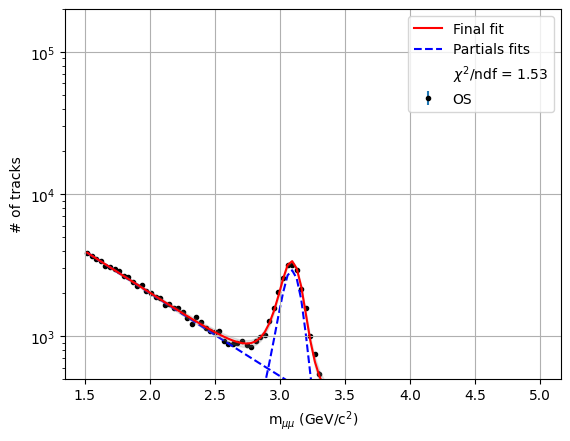

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

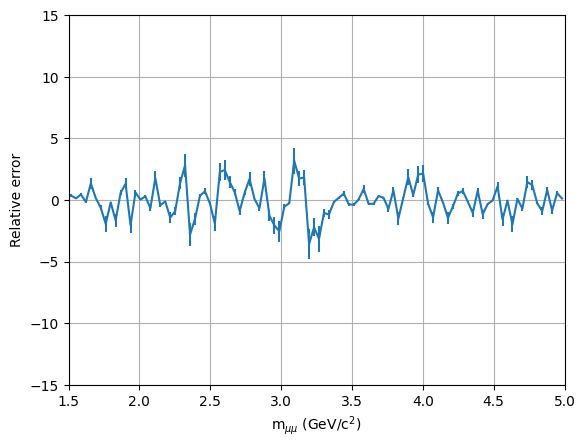

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dNA60(pcov, x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    
    def dNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) - (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(-2*mu + 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2,
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(-p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) + (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])  

    def dNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
            return np.piecewise(x, 
                                [(x - mu)/sig < alphaL, 
                                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                                 (x - mu)/sig > alphaR],
                                [lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/sig**2), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) + (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(2*mu - 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2, 
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) - (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                [(x - mu)/sig < alphaL, 
                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                 (x - mu)/sig > alphaR],
                [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*(-mu + x)*np.log(alphaL - (-mu + x)/sig)/(2*sig**2*np.sqrt(alphaL - (-mu + x)/sig)) + (-mu + x)*(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig**2*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                 lambda x: 1.0*N*(-mu + x)**2*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**3,
                 lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*(-mu + x)*np.log(-alphaR + (-mu + x)/sig)/(2*sig**2*np.sqrt(-alphaR + (-mu + x)/sig)) - (-mu + x)*(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig**2*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    
    def IdNA60dx(x, *args):
        return quad(dNA60dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dN(x, *args):
        return quad(dNA60dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dmu(x, *args):
        return quad(dNA60dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dsig(x, *args):
        return quad(dNA60dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * (((stop - start)/bins)/2)**2 \
                   + IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[0, 0] \
                   + IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[1, 1] \
                   + IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[2, 2] \
                   + 2 * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[2, 1])))


N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dNA60(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  19716.836632277907  +/-  532.779577676421 (stat.)
